# TyniCo Data


The data in spreadsheet has six tabs: sku master and separate tabs for each of the following stores: 312, 323, 415, 521, and 632. The store tabs contain all of the daily sales information for the last two years for that respective store. It lists the database on transaction ID, date, the SKU, quantity sold that day, and total revenue from those sales. The SKU master tab contains some information on each SKU, such as its name, weight, cube, unit cost, etc.

A stock keeping unit (SKU) is a machine-readable bar code that's most often seen printed on product labels, that lets vendors expeditiously scan and track the movement of inventory.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'0.24.2'

In [3]:
import sys
sys.getdefaultencoding()
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [4]:
%matplotlib inline

In [5]:
# import multitab exel file
tiny = pd.read_excel(io = "./Data/TinyCo_Data_RAW.xlsx", 
                     sheet_name = None )

In [6]:
# multitab exel file loaded as a dictionary
type(tiny)

collections.OrderedDict

In [7]:
# each tab's name is a key, each table is a value
tiny.keys()

odict_keys(['SKU Master', 'Store 312', 'Store 323', 'Store 415', 'Store 521', 'Store 632'])

In [8]:
# remove spacecs in keys
new_keys = [x.replace(" ", "") for x in tiny.keys()]
tiny = dict(zip(new_keys, tiny.values()))
tiny.keys()

dict_keys(['SKUMaster', 'Store312', 'Store323', 'Store415', 'Store521', 'Store632'])

In [9]:
# number of columns/names
tiny["Store312"].shape

(3696, 6)

In [10]:
# column names
tiny["Store312"].columns

Index(['DB_ID', 'SKU', 'Store', 'Date', 'Unit Sales', 'Dollar Sales'], dtype='object')

In [11]:
# Use underscores to enable attribute access/jupyter completion
tiny["Store312"].columns = [x.replace(' ', '_') for x in tiny["Store312"].columns]

In [12]:
# data type of each column
tiny["Store312"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 6 columns):
DB_ID           3696 non-null int64
SKU             3696 non-null object
Store           3696 non-null int64
Date            3696 non-null datetime64[ns]
Unit_Sales      3646 non-null object
Dollar_Sales    3616 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 173.3+ KB


In [13]:
# data type of each column
tiny["Store312"].dtypes

DB_ID                    int64
SKU                     object
Store                    int64
Date            datetime64[ns]
Unit_Sales              object
Dollar_Sales           float64
dtype: object

In [14]:
# look at the data
tiny["Store312"].head()

,DB_ID,SKU,Store,Date,Unit_Sales,Dollar_Sales
0,79444,50012011250,312,2014-08-04,3,29.97
1,79445,50012011250,312,2014-08-05,2,19.98
2,79446,50012011250,312,2014-08-06,5,49.95
3,79447,50012011250,312,2014-08-07,3,29.97
4,79448,50012011250,312,2014-08-08,7,69.93


## Typical checks

• Invalid values - negative, text, too small, too big, missing

• Mismatches between related data sets - # of rows, # of cols

• Duplication – unique identifiers

• Human error – wrong dates, invalid assumptions

• Always explore the outliers – they are the most interestng!

In [15]:
# find duplicated rows
sum(tiny["Store312"].duplicated())

3

In [16]:
# Remove duplicated records
tiny["Store312"] = tiny["Store312"].drop_duplicates()

In [17]:
tiny["Store312"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3693 entries, 0 to 3695
Data columns (total 6 columns):
DB_ID           3693 non-null int64
SKU             3693 non-null object
Store           3693 non-null int64
Date            3693 non-null datetime64[ns]
Unit_Sales      3643 non-null object
Dollar_Sales    3613 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 202.0+ KB


In [18]:
# how many records without data
tiny["Store312"].isna().sum()

DB_ID            0
SKU              0
Store            0
Date             0
Unit_Sales      50
Dollar_Sales    80
dtype: int64

In [19]:
# look at missing values
tiny["Store312"][(tiny["Store312"]['Unit_Sales'].isnull()) | (tiny["Store312"]['Dollar_Sales'].isnull())].head()

,DB_ID,SKU,Store,Date,Unit_Sales,Dollar_Sales
16,79460,50012011250,312,2014-08-22,NaN,NaN
26,79470,50012011250,312,2014-09-03,-A45%0 9,NaN
49,79493,50012011250,312,2014-10-02,NaN,NaN
55,79499,50012011250,312,2014-10-09,NaN,NaN
58,79502,50012011250,312,2014-10-13,-A45%0 2,NaN


In [20]:
# remove NaN data
tiny["Store312"] = tiny["Store312"].dropna()

In [21]:
# unit_sales convert to numeric
tiny["Store312"]["Unit_Sales"] = tiny["Store312"]["Unit_Sales"].astype('int64')

In [22]:
tiny["Store312"]["SKU"].value_counts()

50012011250    581
8000520021     574
8000451112     572
50012011240    509
7312455520     459
7312455530     415
50012011340    327
50012011341    141
50013000110     27
50*12011250      8
Name: SKU, dtype: int64

In [23]:
# convert SKU to strings
tiny["Store312"]["SKU"] = tiny["Store312"]["SKU"].astype('str')

In [24]:
# correct some SKU entries
tiny["Store312"]["SKU"] = tiny["Store312"]["SKU"].str.replace('*', '0')

In [25]:
# outliers
# correct reccords that probably could be multiplied by 10,000

tiny["Store312"]["Unit_Sales"] = tiny["Store312"]["Unit_Sales"].where(tiny["Store312"]["Unit_Sales"] < 10000, 
                                                                      tiny["Store312"]["Unit_Sales"]/10000)

tiny["Store312"]["Dollar_Sales"] = tiny["Store312"]["Dollar_Sales"].where(tiny["Store312"]["Dollar_Sales"] < 10000, 
                                                                      tiny["Store312"]["Dollar_Sales"]/10000)


In [26]:
tiny["Store312"].describe()

,DB_ID,Store,Unit_Sales,Dollar_Sales
count,3.613000e+03,3613.0,3613.000000,3613.000000
mean,5.023810e+05,312.0,5.771104,75.724188
std,6.903966e+05,0.0,9.019354,118.912244
min,7.944400e+04,312.0,-6.000000,-59.940000
25%,8.284900e+04,312.0,2.000000,15.980000
50%,9.381800e+04,312.0,3.000000,31.990000
75%,1.000642e+06,312.0,5.000000,68.970000
max,2.001795e+06,312.0,42.000000,699.930000


## More questions to the data

##### How do the different SKUs behave?

In [27]:
tiny["Store312"][["Dollar_Sales", "Unit_Sales"]].groupby(tiny["Store312"]["SKU"]).sum()

,Dollar_Sales,Unit_Sales
SKU,,
50012011240,10013.65,1135
50012011250,21889.89,2011
50012011340,3109.88,612
50012011341,1457.16,284
50013000110,10404.99,801
7312455520,20773.73,727
7312455530,26231.59,1141
8000451112,152318.02,11398
8000520021,27392.58,2742


In [28]:
# print(plt.style.available)

In [29]:
plt.style.use(['ggplot']) 

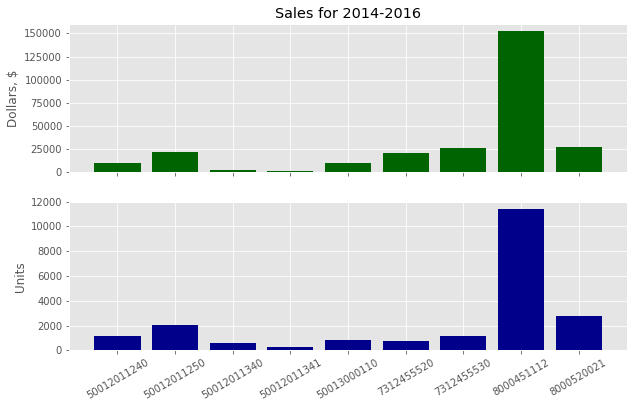

In [65]:
# create a two-item tuple object containing the Figure and two Axes objects
fig, ax = plt.subplots(2)

# using Figure method to set up the size
fig.set_size_inches(10, 6)

SKU = tiny["Store312"][["Dollar_Sales", "Unit_Sales"]].groupby(tiny["Store312"]["SKU"]).sum()

ax[0].bar(SKU.index, SKU["Dollar_Sales"], color = 'darkgreen')
ax[0].set_title("Sales for 2014-2016")
ax[0].set_ylabel("Dollars, $")
ax[0].set_xticklabels([])
#ax[0].set_xticks([])

ax[1].bar(SKU.index, SKU["Unit_Sales"], color = 'darkblue')
ax[1].set_ylabel("Units")
ax[1].set_xlabel("")
ax[1].set_xticklabels(SKU.index, rotation = 30)

plt.savefig("./Figs/Sales_SKU_all_period.pdf");

##### How do sales differ by month? by week? by day of week? 
##### TinyCo is thinking of running a one day promotion each week – which day of week makes the most sense for store 312?

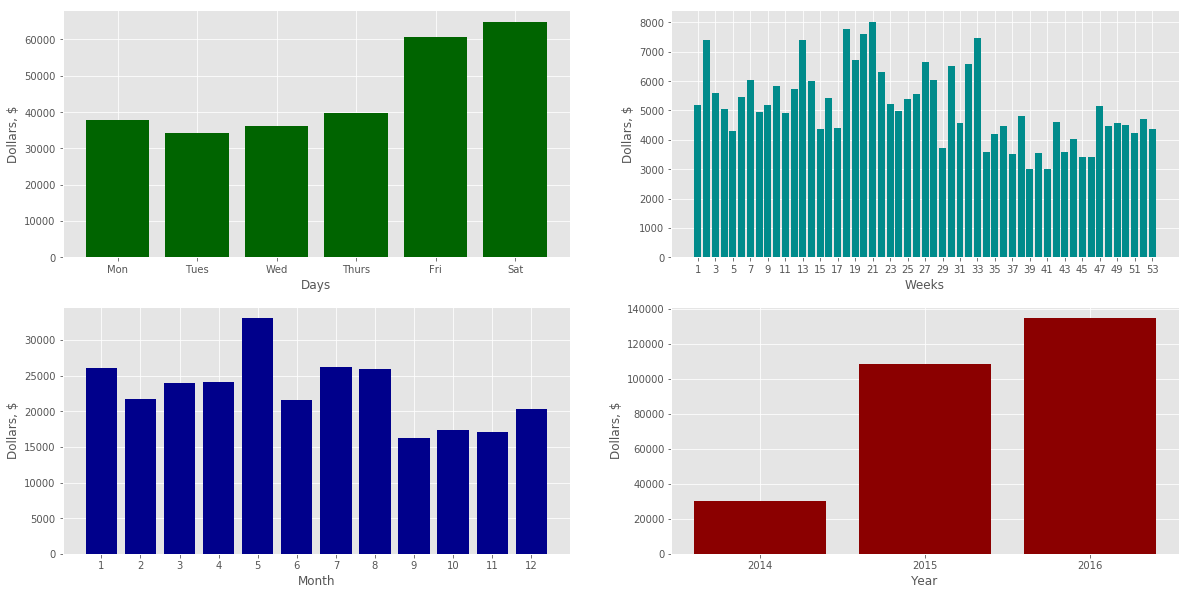

In [67]:
store312 = tiny["Store312"]

# add new variables
store312["Day"] = store312["Date"].dt.day
store312["Week"] = store312["Date"].dt.week
store312["Month"] = store312["Date"].dt.month
store312["Year"] = store312["Date"].dt.year

# create new plot
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20, 10)

# total sales for all period

# by day of week
sales_per_day = store312[["Unit_Sales", "Dollar_Sales", "Date"]].set_index("Date")
sales_per_day = sales_per_day.groupby(sales_per_day.index.dayofweek).sum()

sales_per_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
                
ax[0,0].bar(sales_per_day.index, sales_per_day["Dollar_Sales"], color = "darkgreen")
ax[0,0].set(ylabel = "Dollars, $", xlabel = "Days")

# per week
sales_per_week = store312[["Unit_Sales", "Dollar_Sales"]].groupby(store312["Week"]).sum()
ax[0,1].bar(sales_per_week.index, sales_per_week["Dollar_Sales"], color = "darkcyan")
ax[0,1].set(ylabel = "Dollars, $", xlabel = "Weeks", xticks = range(1, 54, 2))

# per month
sales_per_month = store312[["Unit_Sales", "Dollar_Sales"]].groupby(store312["Month"]).sum()
ax[1,0].bar(sales_per_month.index, sales_per_month["Dollar_Sales"], color = "darkblue")
ax[1,0].set(ylabel = "Dollars, $", xlabel = "Month", xticks = range(1, 13, 1))

# per year
sales_per_year = store312[["Unit_Sales", "Dollar_Sales"]].groupby(store312["Year"]).sum()
ax[1,1].bar(sales_per_year.index,sales_per_year["Dollar_Sales"], color = "darkred")
ax[1,1].set(ylabel = "Dollars, $", xlabel = "Year", xticks = store312["Year"].unique())

plt.savefig("./Figs/sales_by_day_month_year.pdf")

del store312["Day"]
del store312["Week"]
del store312["Month"]
del store312["Year"]

#### Are sales prices per SKU consistent?
 

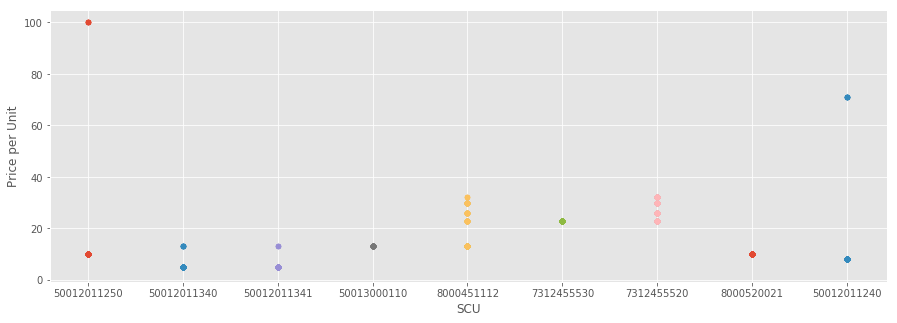

In [66]:
# create a dictionary with keys = SCUs, and values = data frames for each SCU
# find price per unit for each category (SCU)

store312_sku = {}

for sku in store312["SKU"].unique():
    
    subset = store312.loc[store312["SKU"] == sku].copy()
    subset["Price_per_Unit"] = round(subset["Dollar_Sales"]/subset["Unit_Sales"], 2)
    
    store312_sku[sku] = subset
    
# check if price per SCU consistent

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

for sku in store312["SKU"].unique():
    #print("SKU: " + sku)
    #print("Price per unit:")
    #print(store312_sku[sku]["Price_per_Unit"].dropna().unique() )
    #print()
    
    ax.scatter(store312_sku[sku].dropna()["SKU"], \
        store312_sku[sku].dropna()["Price_per_Unit"], s = 25)
    ax.set(ylabel = "Price per Unit", xlabel = "SCU" )

plt.savefig("./Figs/Price_per_Unit__SCU.pdf")

#### Are there trends in sales over time?

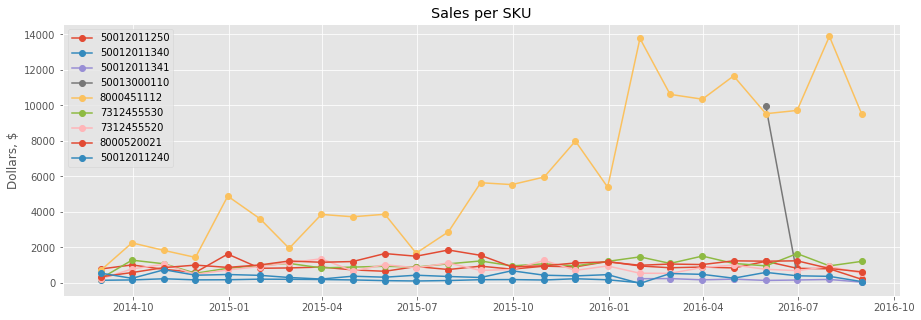

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

for sku in store312["SKU"].unique():
    
    sales = store312_sku[sku][["Date","Dollar_Sales"]]
    sales = sales.set_index("Date").resample('M').sum()
        
    ax.plot(sales.index, sales["Dollar_Sales"], label = sku, marker = 'o')
    ax.set(ylabel = "Dollars, $", title = "Sales per SKU")

plt.legend();

##### Which month has the highest average sales in dollars for store 312?

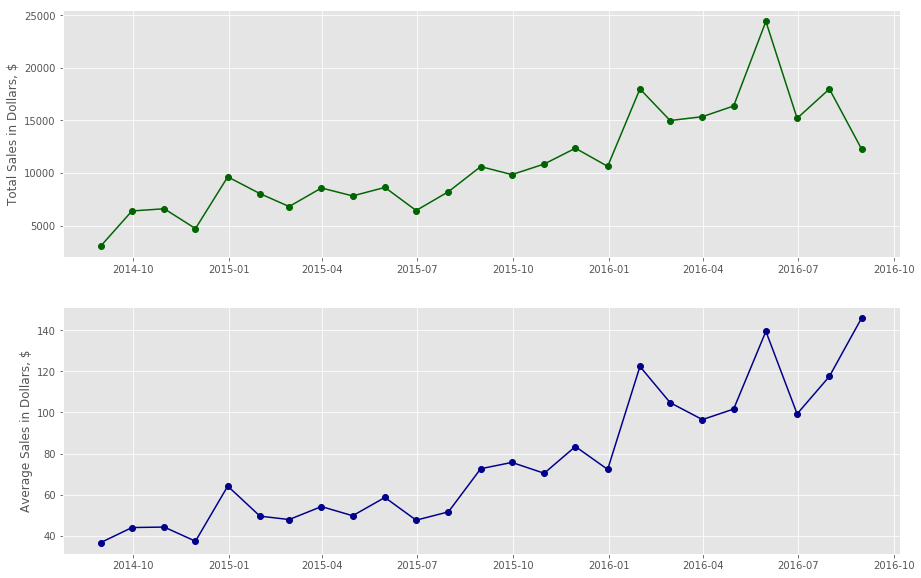

In [80]:
fig, ax = plt.subplots(2)
fig.set_size_inches(15, 10)

sales = store312[["Date","Dollar_Sales"]]
sales = sales.set_index("Date").resample('M').sum()
        
ax[0].plot(sales.index, sales["Dollar_Sales"], marker = 'o', color = "darkgreen")
ax[0].set(ylabel = "Total Sales in Dollars, $")

sales = store312[["Date","Dollar_Sales"]]
sales = sales.set_index("Date").resample('M').mean()
ax[1].plot(sales.index, sales["Dollar_Sales"], marker = 'o', color = "darkblue")
ax[1].set(ylabel = "Average Sales in Dollars, $");

##### Do the returns (negative sales) correlate to other sales? 

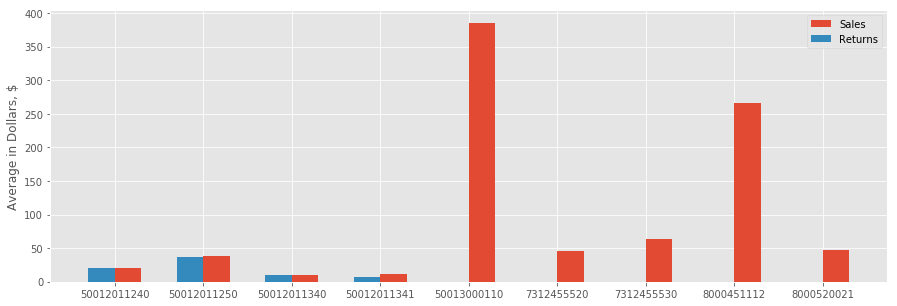

In [83]:

returns = store312[store312["Dollar_Sales"] < 0].groupby(store312["SKU"]).mean()
sales = store312[store312["Dollar_Sales"] > 0].groupby(store312["SKU"]).mean()

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax.bar(sales.index,  sales["Dollar_Sales"], label = "Sales", width = 0.3, align = 'edge')
ax.bar(returns.index, -returns["Dollar_Sales"], label = "Returns", align = 'edge', width = -0.3)

ax.set(ylabel = "Average in Dollars, $", xticks = sales.index)

plt.legend()
plt.show()